DRUG_DISCOVERY_HIV_INHIBBITOR_USING_GNN

IMPORTINNG LIBRARIES

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw
from collections import Counter


In [18]:
df= pd.read_csv("C:\Internship\DRUG_DISCOVERY_HIV_INHIBITOR\dataset\HIV.csv")

In [20]:
df.head()

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


In [21]:

df['HIV_active'].value_counts(0)

HIV_active
0    39684
1     1443
Name: count, dtype: int64

In [22]:
print("Shape of data:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.describe()

Shape of data: (41127, 3)

Missing values:
 smiles        0
activity      0
HIV_active    0
dtype: int64


,HIV_active
count,41127.000000
mean,0.035086
std,0.184001
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


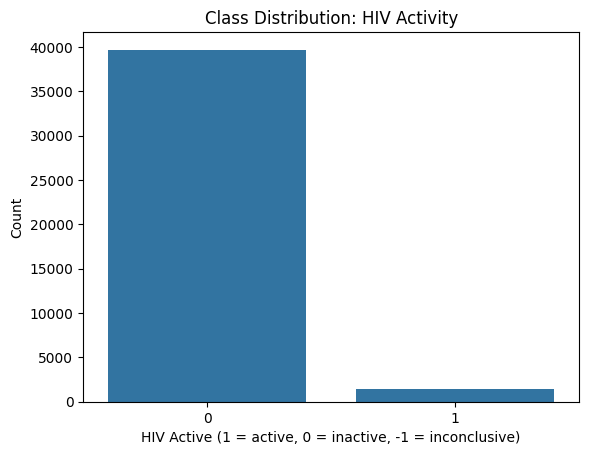

In [23]:
sns.countplot(data=df, x='HIV_active')
plt.title("Class Distribution: HIV Activity")
plt.xlabel("HIV Active (1 = active, 0 = inactive, -1 = inconclusive)")
plt.ylabel("Count")
plt.show()

In [24]:
print(df['HIV_active'].value_counts(normalize=True) * 100)

HIV_active
0    96.491356
1     3.508644
Name: proportion, dtype: float64


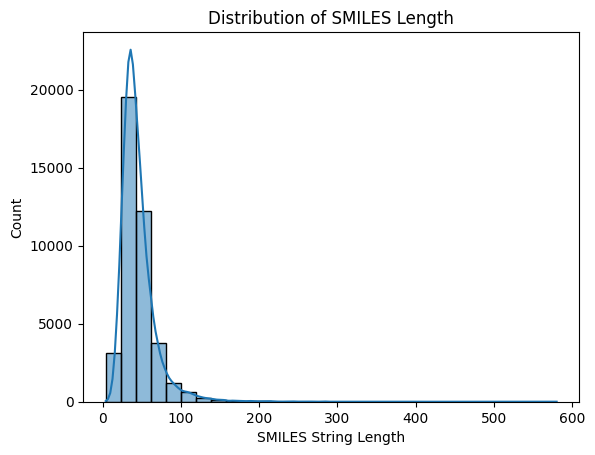

In [25]:
df['smiles_length'] = df['smiles'].apply(len)
sns.histplot(df['smiles_length'], bins=30, kde=True)
plt.title("Distribution of SMILES Length")
plt.xlabel("SMILES String Length")
plt.show()

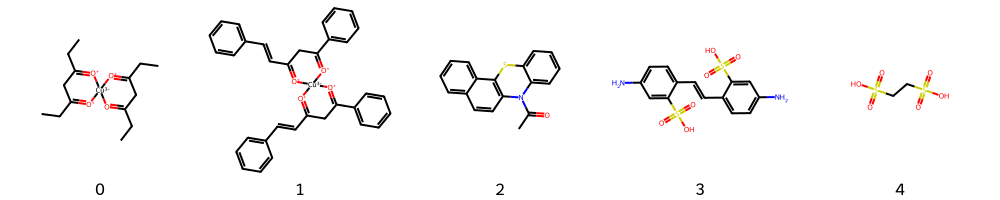

In [26]:
mols = [Chem.MolFromSmiles(smi) for smi in df['smiles'][:5]]
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200,200), legends=[str(i) for i in range(5)])


In [27]:
print("Unique SMILES strings:", df['smiles'].nunique())

Unique SMILES strings: 41127


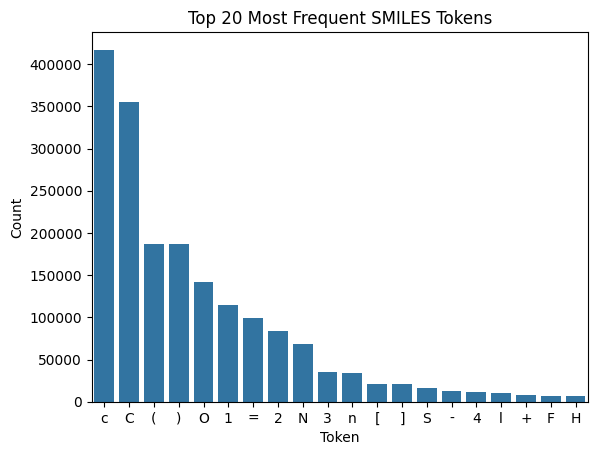

In [28]:
from itertools import chain
tokens = list(chain.from_iterable([list(smi) for smi in df['smiles']]))
token_counts = Counter(tokens)
common_tokens = pd.DataFrame(token_counts.most_common(20), columns=['Token', 'Count'])

sns.barplot(data=common_tokens, x='Token', y='Count')
plt.title("Top 20 Most Frequent SMILES Tokens")
plt.show()